# **DEEPLEARNING**
# **PROYECT 1**
**UNIVERSIDAD MILITAR NUEVA GRANADA**

**Jose Luis Pineda Barrera**

**Daniela Fuentes Bello**



# 1. Librerías

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random
# Carga de módulos
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error  # <-- Asegúrate de importar esto

# 2. Training data (Dataset)

Generar datos de forma similar a anterior ejemplo


In [ ]:
# Cargar el dataset
data = pd.read_csv('/content/Dataset.csv')
df = data

# Eliminar filas con valores faltantes
df_clean = df.dropna()

# Especificar las columnas que se desean eliminar
columns_to_drop = [
    'Nombre', 'Departamento de Nacimiento','ID Departamento de Nacimiento',
    'ID Municipio de Nacimiento', 'Municipio de Nacimiento', 'Email Oficina',
    'Codigo Sigep', 'NIT Entidad', 'Orden', 'Suborden',
    'ID Departamento Entidad', 'Departamento Ubicación Entidad', 'Nivel Entidad', 'Naturaleza Jurídica',
    'Longitud Municipio Entidad', 'Latitud Municipio Entidad',
    'Denominación Empleo Actual', 'Fecha de vinculación', 'Id Municipio Entidad','Municipio Ubicación Entidad','Clasificación Organica'
]

df_clean = df_clean.drop(columns=columns_to_drop)

# Reemplazar las comas y convertir a float en todas las columnas numéricas
columns_to_convert = ['Asignación Básica Salarial', 'Meses de Experiencia Público',
                      'Meses de Experiencia Privado', 'Meses de Experiencia Docente']

for column in columns_to_convert:
    df_clean[column] = df_clean[column].replace(',', '', regex=True).astype(float)
#Encoding one-hot
df_clean = pd.get_dummies(df_clean, columns=['Sexo'], drop_first=True)
#LabelEncoding
# Identificar las columnas categóricas
categorical_columns = ['Nivel Educativo', 'Nivel Jerarquico Empleo', 'Dependencia Empleo Actual']

# Aplicar Label Encoding a todas las columnas categóricas
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_clean[column] = label_encoder.fit_transform(df_clean[column])

# Verificar las primeras filas del DataFrame procesado
print("Primeras filas del DataFrame procesado:")
print(df_clean.head())

# Asignar el DataFrame limpio y codificado a 'data'
data = df_clean

<ipython-input-2-9690c9bd2a15>:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Dataset.csv')


Primeras filas del DataFrame procesado:
      Número de Identificación  Meses de Experiencia Público  \
201                   396279.0                         216.0   
1898                 3228474.0                         163.0   
2095                 3353129.0                         356.0   
2326                 3532524.0                          87.0   
2426                 3621403.0                         424.0   

      Meses de Experiencia Privado  Meses de Experiencia Docente  \
201                            0.0                          18.0   
1898                         253.0                          30.0   
2095                          85.0                          12.0   
2326                           7.0                           9.0   
2426                           0.0                          14.0   

      Meses de Experiencia Independiente  Nivel Educativo  \
201                                    0                2   
1898                                   0    

In [ ]:
# Selección de características de entrada y variable objetivo
X = df_clean[['Nivel Educativo', 'Nivel Jerarquico Empleo', 'Meses de Experiencia Público',
        'Meses de Experiencia Privado', 'Meses de Experiencia Docente', 'Dependencia Empleo Actual']]
y = df_clean['Asignación Básica Salarial']

# 3. Lectura del dataset por lotes

Aleatorizar y leer por minilotes

In [ ]:
# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 26244670291968.0000 - mean_absolute_error: 4487467.5000 - val_loss: 23375130918912.0000 - val_mean_absolute_error: 4166744.0000
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25954508341248.0000 - mean_absolute_error: 4341940.0000 - val_loss: 14941774938112.0000 - val_mean_absolute_error: 3047152.5000
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10798101430272.0000 - mean_absolute_error: 2555335.5000 - val_loss: 10986012540928.0000 - val_mean_absolute_error: 2664075.5000
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7905905475584.0000 - mean_absolute_error: 2114177.0000 - val_loss: 7538702024704.0000 - val_mean_absolute_error: 1986086.0000
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8250609631232.0000 - mean_absolute_error: 2090700.7500 - val_loss: 6678279356416.0000 - val_mean_absolute_error: 1950776.7500
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6101081784320.0000 -

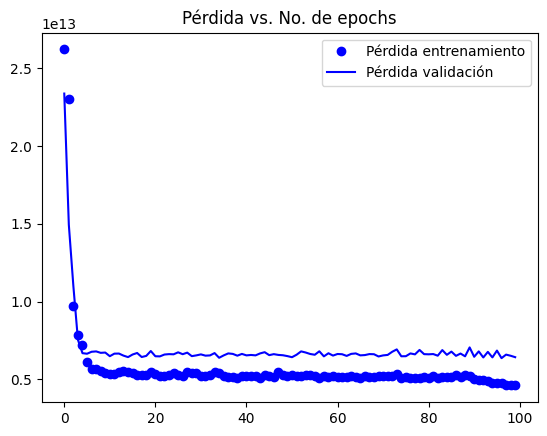

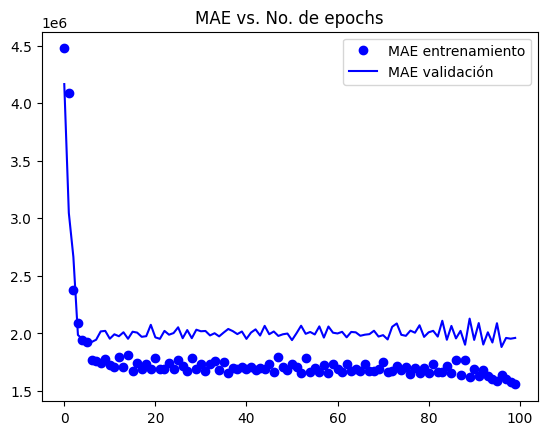

In [ ]:
# Hiperparámetros
batch_s = 32
lr = 0.1
num_epochs = 100
optimizerf = tf.keras.optimizers.Adam(learning_rate=lr)

# Construcción del modelo de regresión
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=X_train.shape[1], activation='relu'),
     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Salida para regresión
])

# Compilar el modelo
model.compile(
    optimizer=optimizerf,
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Entrenamiento del modelo
history = model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    batch_size=batch_s,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluación del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Y_pred:", y_pred)

# Visualización del rendimiento durante el entrenamiento

# Gráfica de Pérdida
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'bo', label='Pérdida entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida validación')
plt.title('Pérdida vs. No. de epochs')
plt.legend()
plt.show()

# Gráfica de MAE
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
plt.plot(epochs, mae, 'bo', label='MAE entrenamiento')
plt.plot(epochs, val_mae, 'b', label='MAE validación')
plt.title('MAE vs. No. de epochs')
plt.legend()
plt.show()